In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.color import rgb2gray

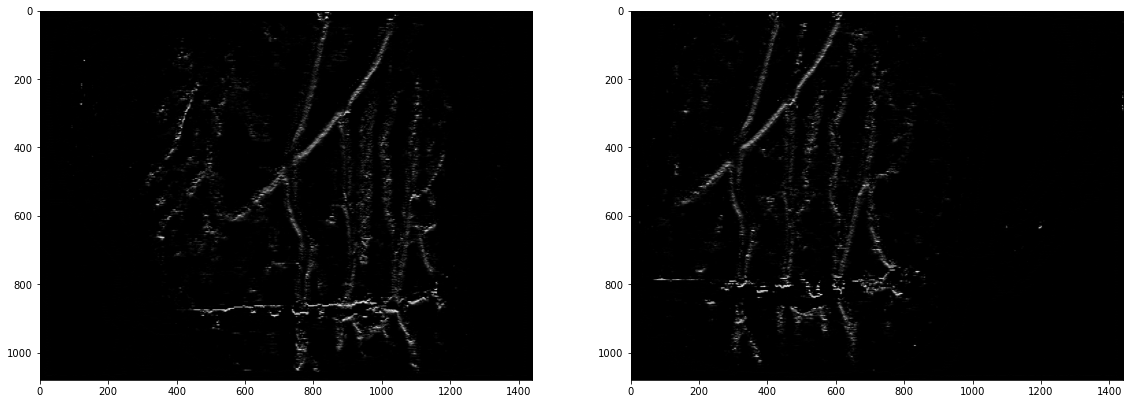

In [76]:
vein_l = cv2.imread(r"./09_05_23/Left_shubham1850nm.png",0)
vein_r = cv2.imread(r"./09_05_23/Right_shubham1850nm.png",0)

vein_isolated_l = cv2.imread(r"./09_05_23/AI Vein/Left_shubham1850nm.png",0)
vein_isolated_r = cv2.imread(r"./09_05_23/AI Vein/Right_shubham1850nm.png",0)

clahe = cv2.createCLAHE(clipLimit = 5)

# feat1 = clahe.apply(vein_l)
# feat2 = clahe.apply(vein_r)

sobel_x = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
feat1 = cv2.filter2D(vein_isolated_l, -1, sobel_x)
feat2 = cv2.filter2D(vein_isolated_r, -1, sobel_x)

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(feat2,cmap='gray')

In [77]:
#scaling down the images
scale = 1
widthl = int(feat1.shape[1]/scale)
heightl = int(feat1.shape[0]/scale)
diml = (widthl, heightl)
img1 = cv2.resize(feat1, diml, cv2.INTER_AREA)

widthr = int(feat2.shape[1]/scale)
heightr = int(feat2.shape[0]/scale)
dimr = (widthr, heightr)
img2 = cv2.resize(feat2, dimr, cv2.INTER_AREA)

In [78]:
orb = cv2.ORB_create(edgeThreshold = 25, patchSize = 30, WTA_K = 4)
KeyPoints1, des1 = orb.detectAndCompute(img1, None)
KeyPoints2, des2 = orb.detectAndCompute(img2, None)
len(KeyPoints1)

500

In [11]:
surf = cv2.xfeatures2d.SURF_create(400)
KeyPoints1, des1 = surf.detectAndCompute(img1, None)
KeyPoints2, des2 = surf.detectAndCompute(img2, None)
len(KeyPoints)

img3 = cv.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img3),plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


In [69]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck= True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
# matches
len(matches)

32

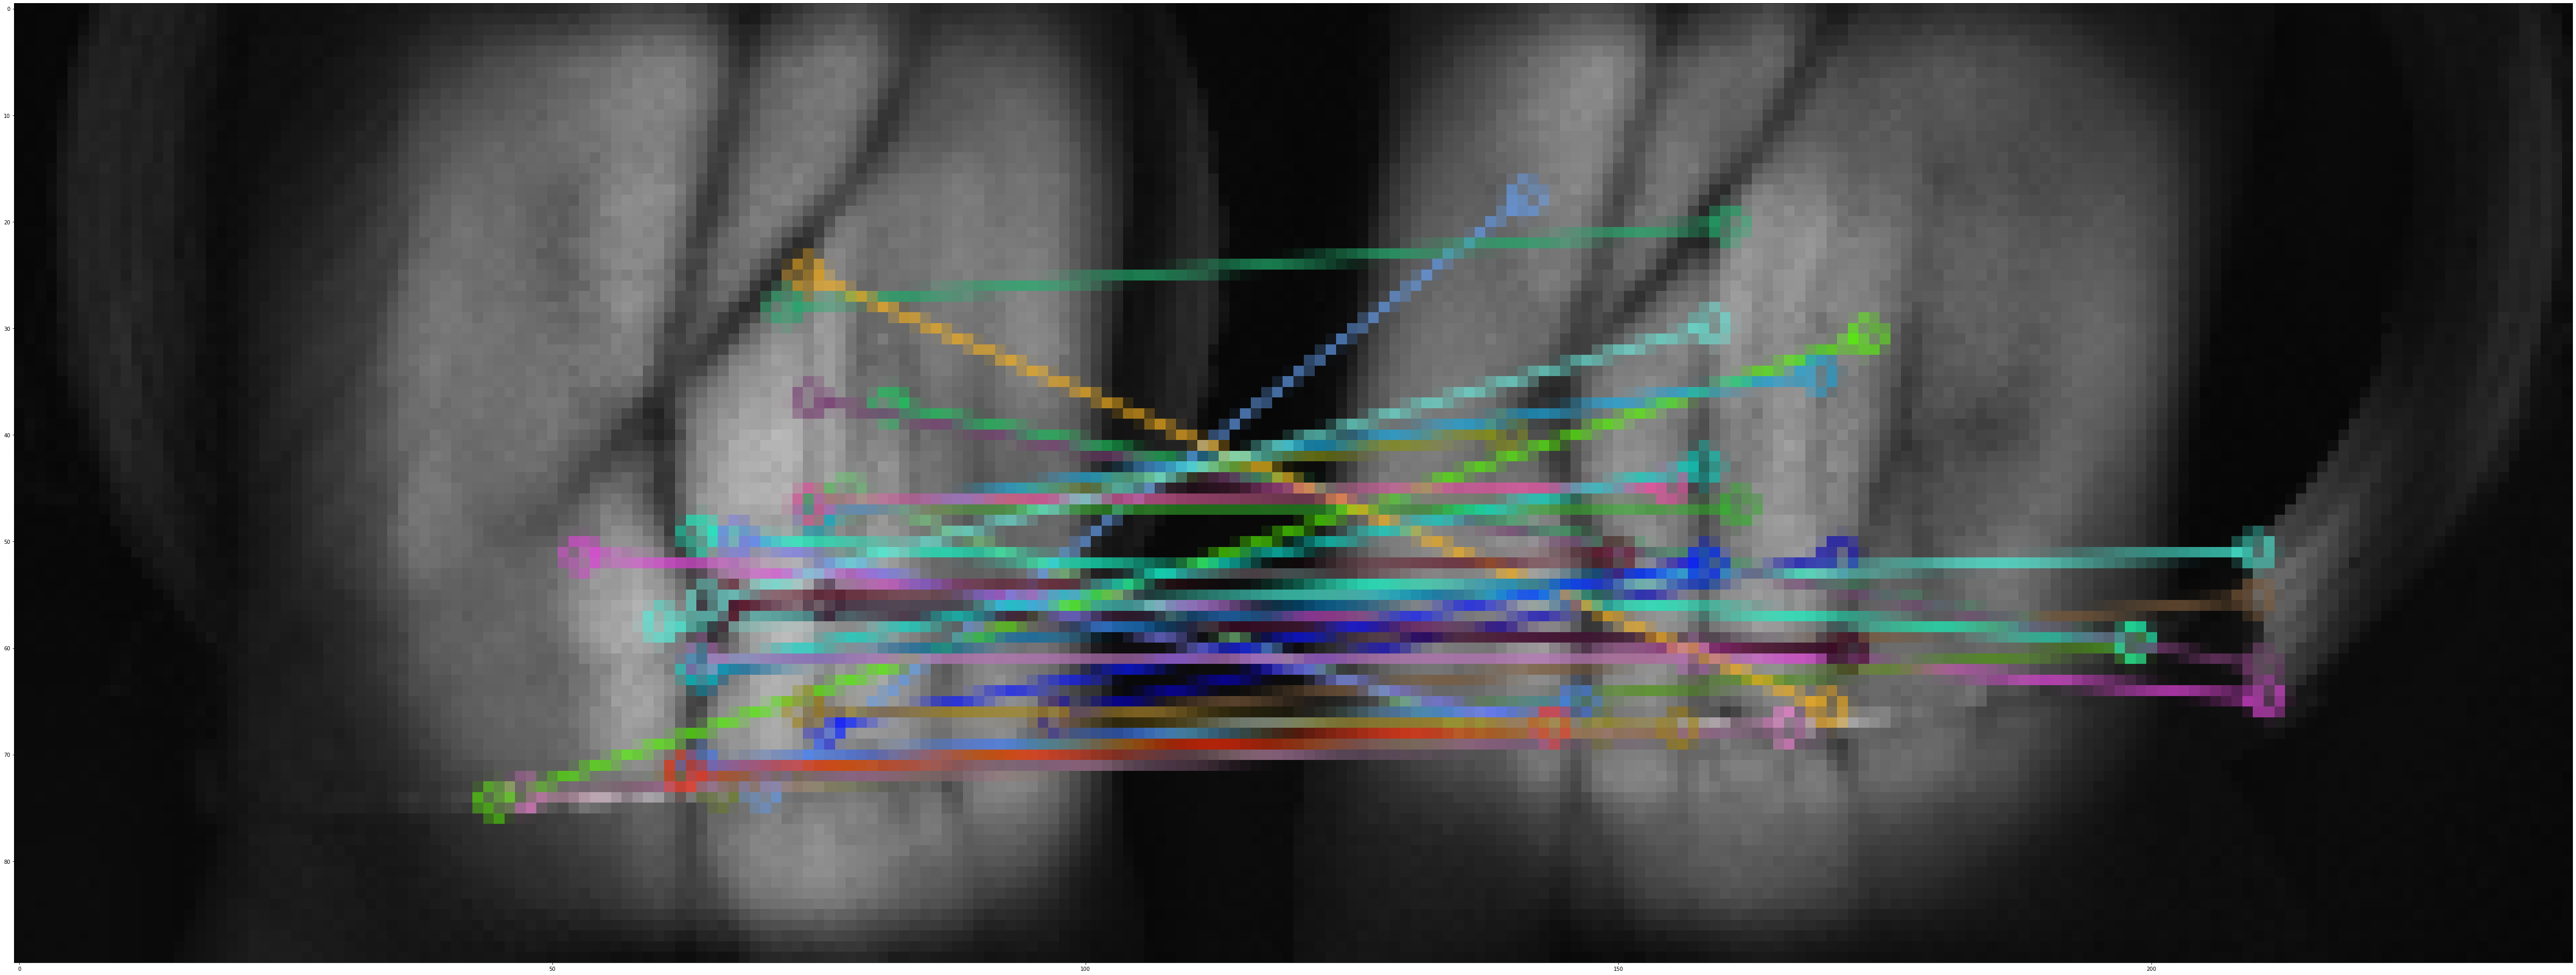

In [73]:
matching_result = []
matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches, None, flags=2)

mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches:
    p1.append([KeyPoints1[match.queryIdx].pt])
    p2.append([KeyPoints2[match.trainIdx].pt])


p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale

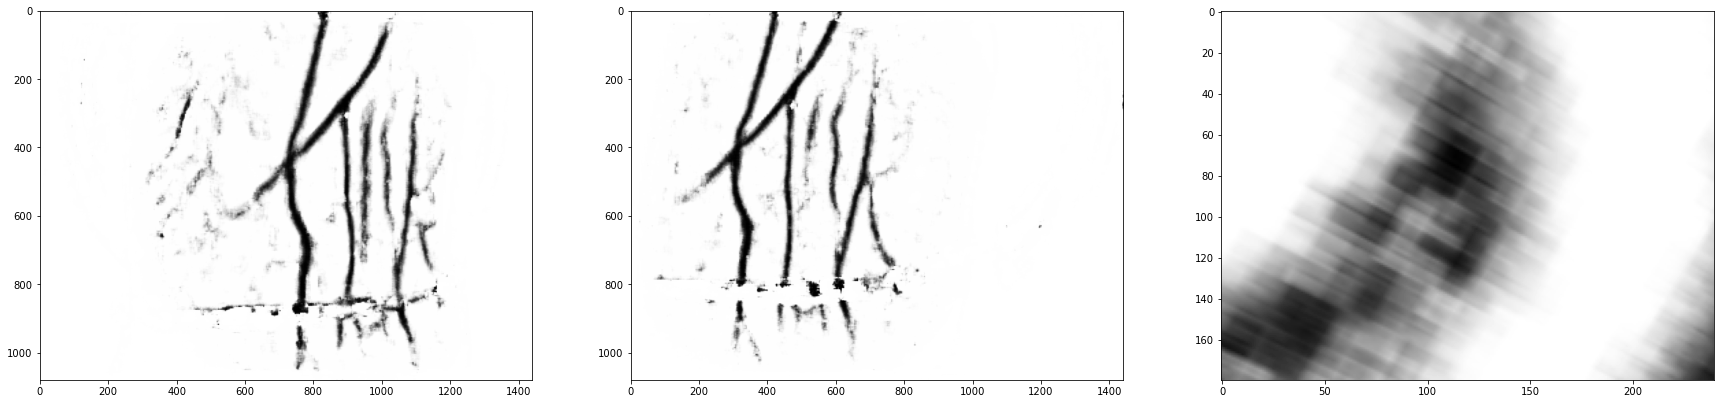

In [74]:
# Homography

h,status = cv2.findHomography(p1, p2, cv2.RANSAC,5,0.999)

im_out = cv2.warpPerspective(vein_isolated_l,  h, (img1.shape[1],img1.shape[0]))

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)
plt.imshow(vein_isolated_l,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(vein_isolated_r,cmap='gray')
cv2.imwrite('image_r.png', img2)

ax = plt.subplot(1,3,3)
plt.imshow(im_out,cmap='gray')
cv2.imwrite('homography_out.png', im_out)

im_out = cv2.resize(im_out,(1440,1080))

a_h = np.where(im_out==255)
a_h=np.array(a_h)

pa_h = []
for i in range(len(a_h[0])):
    pa_h32 = (a_h[0][i],a_h[1][i])
    pa_h.append(pa_h32)

pa_h = np.array(pa_h)

In [142]:
# matching_result = []
# matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches[0:j+1], None, flags=2)

# mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
# plt.figure(figsize=(300,100))
# ax = plt.subplot(1,3,1)
# plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches:
    p1.append(detector_extractor1.keypoints[match[0]])
    p2.append(detector_extractor2.keypoints[match[1]])

p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale

In [206]:
kpmatch1 = []
kpmatch2 = []
matches_ = []

i = 0
j = 0
for match in matches:
    if np.linalg.norm(np.asarray(KeyPoints1[match.queryIdx].pt) - np.asarray(KeyPoints2[match.trainIdx].pt)) < 1000:
        if np.linalg.norm(np.asarray(KeyPoints1[match.queryIdx].pt) - np.asarray(KeyPoints2[match.trainIdx].pt)) > 0:
            matches[i] = match
#             print(matches[i])
            j = j+1
        
    else:
        match.distance = 5000
        matches[i] = match
#         print(matches[i])
    i = i+1

matches = sorted(matches, key = lambda x:x.distance)
len(matches)

80

In [207]:
kpmatch1 = []
kpmatch2 = []
matches_ = []

for match in matches:
    if np.linalg.norm(np.asarray(KeyPoints1[match.queryIdx].pt) - np.asarray(KeyPoints2[match.trainIdx].pt)) < 20:
        kpmatch1.append(KeyPoints1[match.queryIdx])
        kpmatch2.append(KeyPoints2[match.trainIdx])
        matches_.append(match)
        
        
kpmatch1 = tuple(kpmatch1)
kpmatch2 = tuple(kpmatch2)
len(kpmatch1)

0

TypeError: 'AxesSubplot' object is not subscriptable

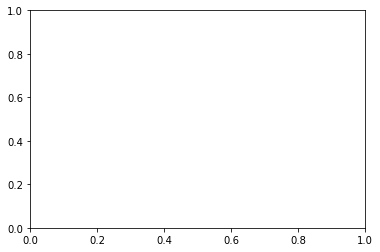

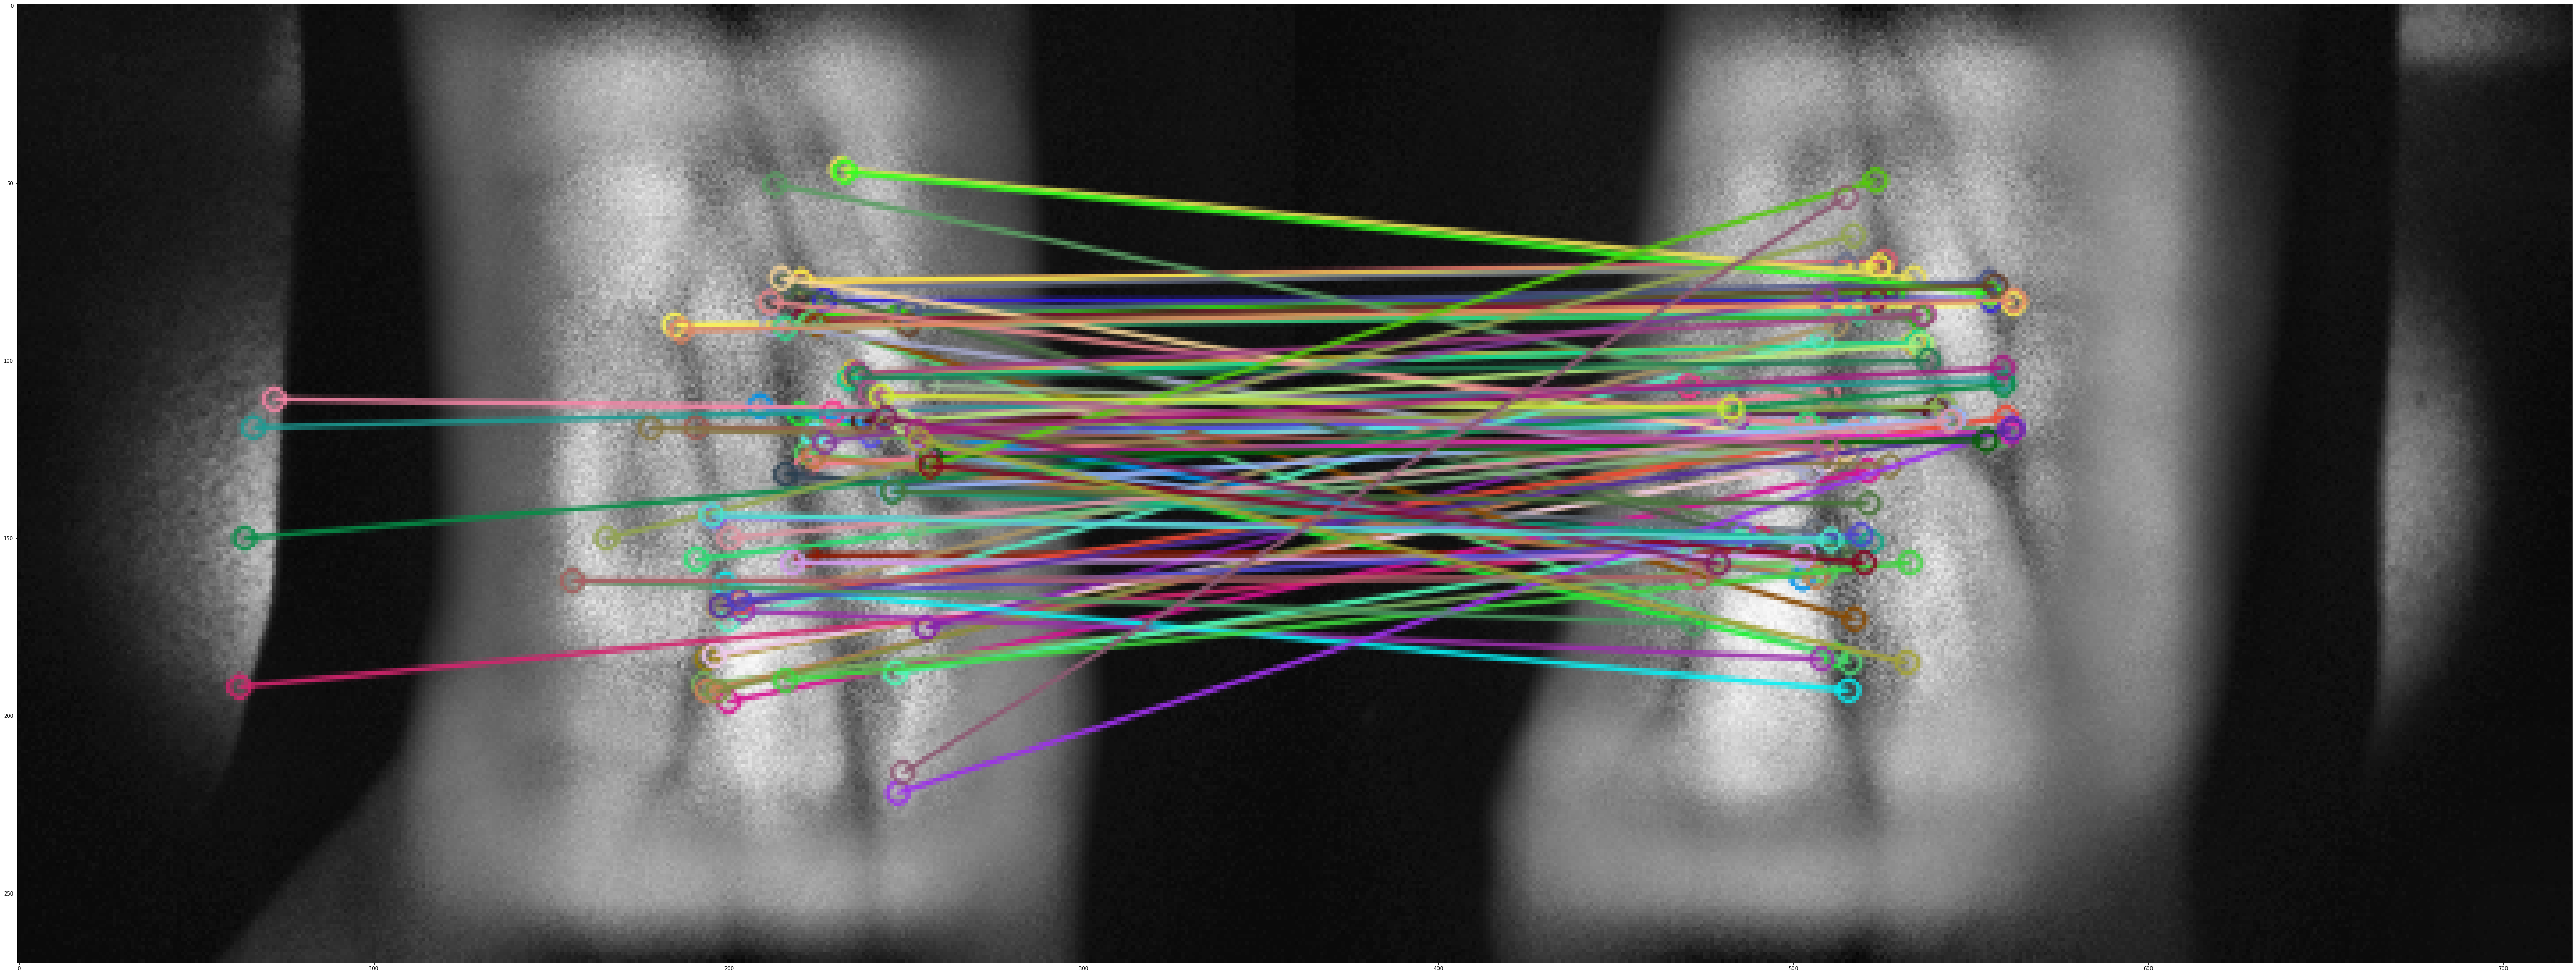

In [164]:

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches = match_descriptors(descriptors1, descriptors2, cross_check=True)

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.gray()

plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(matching_result, cmap = 'gray')
plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

100

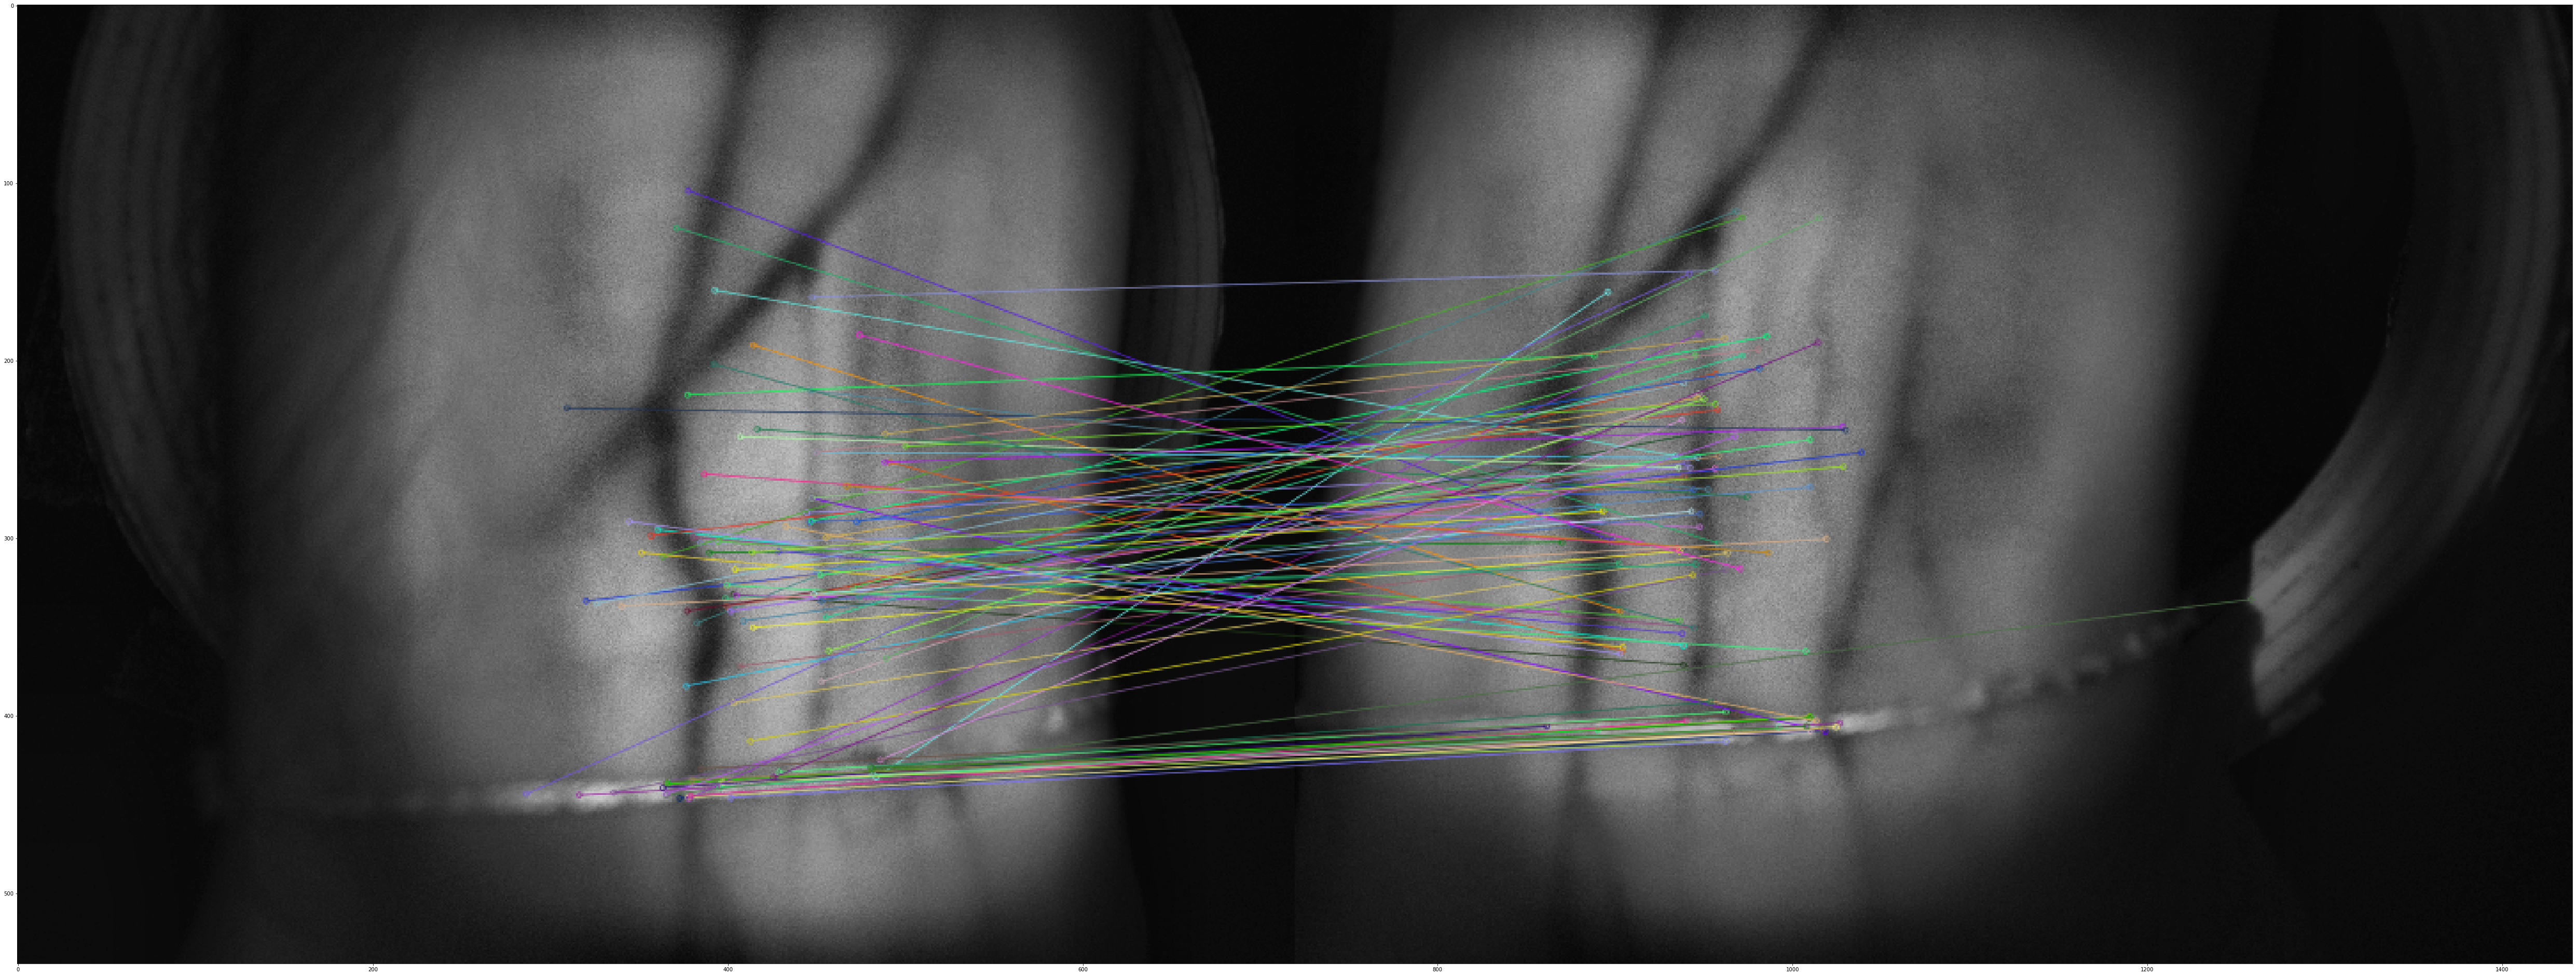

In [198]:
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, AffineTransform
    
# Ransac
model, inliers = ransac((p1, p2), AffineTransform, min_samples=4,residual_threshold=1, max_trials=1000)

n_inliers = np.sum(inliers)

inlier_keypoints_left = [cv2.KeyPoint(point[0], point[1], 1) for point in p1[inliers]]
inlier_keypoints_right = [cv2.KeyPoint(point[0], point[1], 1) for point in p2[inliers]]
placeholder_matches = [cv2.DMatch(idx, idx, 1) for idx in range(n_inliers)]
mr = cv2.drawMatches(img1, inlier_keypoints_left, img2, inlier_keypoints_right, placeholder_matches, None)

mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(mr, cmap = 'gray')

len(inliers)